# 彩图与深度转化为Open3D彩色点云

```
@作者: 阿凯爱玩机器人
@QQ: 244561792
@微信: xingshunkai
@邮箱: xingshunkai@qq.com
@网址: deepsenserobot.com
@B站: "阿凯爱玩机器人"
```
## 导入依赖

In [1]:
# 将pyorbbecsdk的动态链接库所在的文件夹，添加到Python Path
import sys
import os

# 导入阿凯写的Orbbec工具库, 确保orbbec_utils.py跟你目前所执行的脚本在同一级目录下
from orbbecsdk_utils import *
# 添加Python Path
add_path_pyorbbecsdk()

# 导入pyorbbecsdk
from pyorbbecsdk import *

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:
import numpy as np
import cv2
import open3d as o3d
from matplotlib import pyplot as plt

## 相机初始化

In [3]:
# 连接设备
ret, device = connect_device()
print(f"[INFO] 设备是否连接成功: {ret}")

# pipeline初始化
pipeline = init_pipeline(device)
# 清空缓冲区
empty_cache(pipeline)

# 获取pipeline的相机参数
camera_param = pipeline.get_camera_param()

[05/27 17:26:56.367301][info][26839][Context.cpp:68] Context created with config: default config!
[05/27 17:26:56.367321][info][26839][Context.cpp:73] Work directory=/home/kyle/Project/奥比中光3D相机/Gemini335-软件资料-阿凯爱玩机器人/02.奥比中光-pyobbecsdk示例代码(Gemini335), SDK version=v1.10.5-20240511-7dc8be9
[05/27 17:26:56.367339][info][26839][LinuxPal.cpp:31] createObPal: create LinuxPal!
[05/27 17:26:56.538317][info][26839][LinuxPal.cpp:142] Create PollingDeviceWatcher!
[05/27 17:26:56.538334][info][26839][DeviceManager.cpp:15] Current found device(s): (1)
[05/27 17:26:56.538338][info][26839][DeviceManager.cpp:24] 	- Name: Orbbec Gemini 335, PID: 0x0800, SN/ID: CP1L44P00049, Connection: USB3.2
[INFO] 设备是否连接成功: True
[05/27 17:26:57.005900][error][26839][HostProtocol.cpp:420] Set property value failed! propertyId:63, rc:{statusCode: 9, respErrorCode: 2, msg: }
[05/27 17:26:57.006185][error][26839][HostProtocol.cpp:420] Set property value failed! propertyId:63, rc:{statusCode: 9, respErrorCode: 2, msg: }


[WARN] 彩图获取失败
[WARN] 彩图获取失败
[WARN] 彩图获取失败
[WARN] 彩图获取失败
[WARN] 彩图获取失败
[WARN] 彩图获取失败
[WARN] 彩图获取失败
[WARN] 彩图获取失败
[WARN] 彩图获取失败
[WARN] 彩图获取失败


## 读取彩图与深度图
设备刚初始化的时候，前几帧图像获取可能会失败。capture函数会自动重试。 

In [11]:
ret, color_img, depth_img = capture(pipeline)

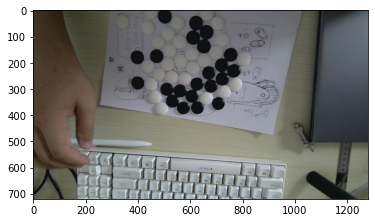

In [9]:
# 绘制彩图
if ret:
    plt.imshow(color_img[:, :, ::-1])

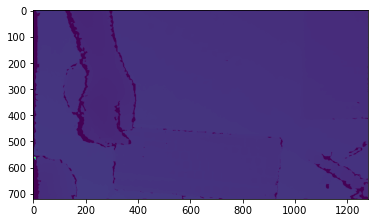

In [13]:
if ret:
    plt.imshow(depth_img)

## 彩图与深度图转化为Open3D彩色点云

In [14]:
# 获取Open3D PCD格式的点云
pcd = create_point_cloud(color_img, depth_img, camera_param)
# 点云可视化
o3d.visualization.draw_geometries([pcd])